# 1. Load CIFAR - 10 database

In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Visualize the first 36 training images

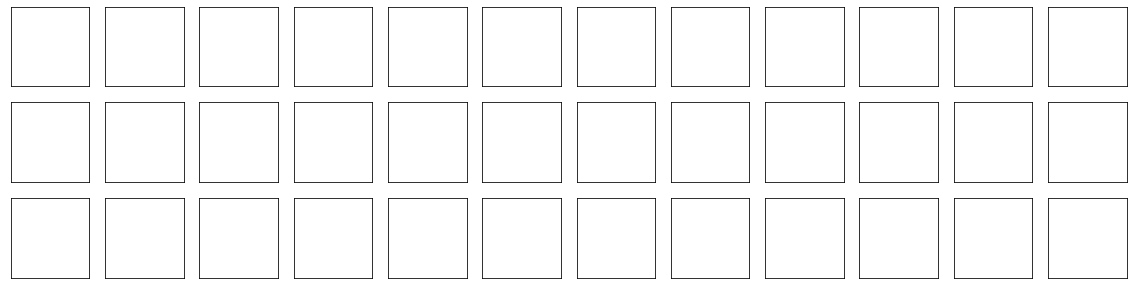

In [25]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i + 1, xticks=[],yticks=[])

# 3. Rescale the images by dividing every pixel in every image by 255

In [10]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = y_test.astype('float32')/255

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# 4. Break dataset into Training,  Testing, Validation sets

In [16]:
from keras.utils import np_utils
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
# break training set into training and validation set
(x_train, x_valid) = x_train[5000:],x_train[:5000]
(y_train, y_valid) = y_train[5000:],y_train[:5000]

In [18]:
# print shape of traning sets 
print('x_train shape = ', x_train.shape)

x_train shape =  (45000, 32, 32, 3)


In [20]:
# print number of training, validation and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'valid samples')

45000 train samples
10000 test samples
5000 valid samples


# 5. Define the model architechure

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [28]:
# define the model = Vanila version model ==> params over 3,000,000
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
____________________________________________

In [29]:
# complie the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [30]:
from keras.callbacks import ModelCheckpoint
# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, 
                 validation_data=(x_valid,y_valid), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 59s - loss: 2.0441 - accuracy: 0.2718 - val_loss: 1.8239 - val_accuracy: 0.3408

Epoch 00001: val_loss improved from inf to 1.82387, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 58s - loss: 1.8487 - accuracy: 0.3306 - val_loss: 1.9840 - val_accuracy: 0.2788

Epoch 00002: val_loss did not improve from 1.82387
Epoch 3/20
 - 57s - loss: 1.8015 - accuracy: 0.3514 - val_loss: 1.6963 - val_accuracy: 0.3870

Epoch 00003: val_loss improved from 1.82387 to 1.69629, saving model to MLP.weights.best.hdf5
Epoch 4/20
 - 58s - loss: 1.7852 - accuracy: 0.3608 - val_loss: 1.7654 - val_accuracy: 0.3792

Epoch 00004: val_loss did not improve from 1.69629
Epoch 5/20
 - 58s - loss: 1.7760 - accuracy: 0.3655 - val_loss: 1.8047 - val_accuracy: 0.3308

Epoch 00005: val_loss did not improve from 1.69629
Epoch 6/20
 - 57s - loss: 1.7697 - accuracy: 0.3715 - val_loss: 1.7312 - val_accuracy: 0.3636

Epoch 00006: val_loss did not improve from 1

KeyboardInterrupt: 

# 8. Load teh model with the best classification acuracy on the validation set

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

# 9. Calculate classification accuracy on test set = 40%

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test Accuracy=',score[1])